In [22]:
!pip install PyQt5
!pip install viser

import math
import os

import numpy as np
import skimage as sk
import skimage.io as skio
import cv2 as cv2
import matplotlib
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import json
import PIL
import PyQt5
import pandas as pd
import torch as torch
import torch.nn as nn
from matplotlib import cm
from PIL import Image, ImageDraw

from scipy.ndimage import gaussian_filter
from skimage.color import rgba2rgb

In [ ]:
model = nn.Sequential(
    nn.Linear(42, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 3),
    nn.Sigmoid()
)



In [ ]:
np_array = np.array([1, 2, 3, 4])
tensor = torch.from_numpy(np_array)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = tensor.to("cuda")
print(tensor.is_cuda)

True


In [ ]:
L = 10

In [23]:
def SPE(x, L):

    return [x] + [math.sin((2 ** (i // 2)) * math.pi * x) if i % 2 == 0 else math.cos((2 ** (i // 2)) * math.pi * x) for i in range(L*2)]

[0.23, 0.6613118653236518, 0.7501110696304596, 0.9921147013144779, 0.12533323356430426, 0.24868988716485482, -0.9685831611286311, -0.4817536741017153, 0.8763066800438636, -0.8443279255020151, 0.5358267949789965, -0.9048270524660195, -0.4257792915650728, 0.7705132427757895, -0.6374239897486894, -0.9822872507286885, -0.18738131458572538, 0.36812455268467936, -0.9297764858882508, -0.684547105928691, 0.7289686274214094]


In [ ]:


fox = skio.imread('./fox.jpg')

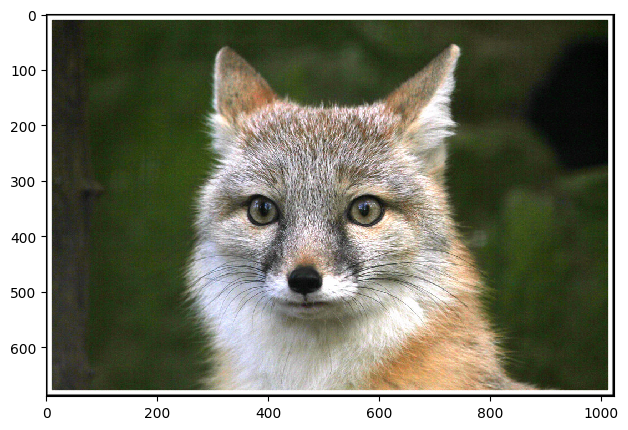

In [ ]:
skio.imshow(fox)

In [ ]:
features = fox[:, :2]  # x, y positions
labels = fox[:, 2:]   # RGB values

In [ ]:
training_data = []
for i in range(len(fox)):
  for j in range(len(fox[0])):
    training_data.append([i,j])
labels = []
for i in range(len(fox)):
  for j in range(len(fox[0])):
    labels.append(fox[i][j])


In [ ]:
training_data = np.array(training_data)

(705536, 2)


In [ ]:
n = len(fox)
m = len(fox[0])

In [ ]:
print(n)

689


In [ ]:
training_datax = training_data[:, 0] / n
training_datay = training_data[:, 1] / m




In [ ]:
new_training_data = np.stack([training_datax, training_datay], axis=1)

In [ ]:
final_training_data = []
for i in new_training_data:
  thingy = SPE(i[0], L)
  thingy.extend(SPE(i[1], L))
  final_training_data.append(thingy)

In [ ]:
del new_training_data
del training_datax
del training_datay

In [ ]:
print(np.array(final_training_data).shape)

(705536, 42)


In [ ]:
labels = np.array(labels)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  7.07106781e-01
   1.00000000e+00  6.12323400e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  6.12323400e-17
   1.22464680e-16 -1.00000000e+00]
 ...
 [ 9.98548621e-01  4.55962521e-03 -9.99989605e-01 ... -7.07106781e-01
   1.00000000e+00  1.03374426e-13]
 [ 9.98548621e-01  4.55962521e-03 -9.99989605e-01 ... -8.28040741e-14
   1.65608148e-13 -1.00000000e+00]
 [ 9.98548621e-01  4.55962521e-03 -9.99989605e-01 ...  7.07106781e-01
  -1.00000000e+00 -4.68194397e-16]]


In [ ]:
labels = labels / 255

In [ ]:
print(labels[382])

[0.01568627 0.01568627 0.01568627]


In [ ]:
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import RandomSampler

# Example training data: An array of pixel positions (x, y) and their corresponding RGB values
# For demonstration, let's create a dummy dataset
  # 1000 samples, each with 2 features (x, y) and 3 RGB values

# Splitting the data into features and labels
   # RGB values
losses  = []
# Convert to PyTorch tensors
features_tensor = torch.tensor(final_training_data, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)
del labels
del final_training_data

# Create a dataset and data loader
dataset = TensorDataset(features_tensor, labels_tensor)



# Using RandomSampler for sampling batches
random_sampler = RandomSampler(dataset)

# Create a DataLoader using the RandomSampler
dataloader_with_sampler = DataLoader(dataset, batch_size=10000, sampler=random_sampler)


# Define a simple training loop
def train_model(model, dataloader, epochs=3000, lr=0.01):
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    epochs = 1000
    i = 0
    while i < epochs:
        for batch_features, batch_labels in dataloader:

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_features)

            # Compute the loss
            loss = criterion(outputs, batch_labels)

            #psnr = 10 * np.log10(loss)
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            i += 1
            if i % 50 == 49:
              print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}")
              losses.append(loss)


# Training the model
train_model(model, dataloader_with_sampler)

NameError: ignored

In [ ]:
final_losses = [i.item() for i in losses]
psnr = 10 * np.log10(np.array(final_losses))


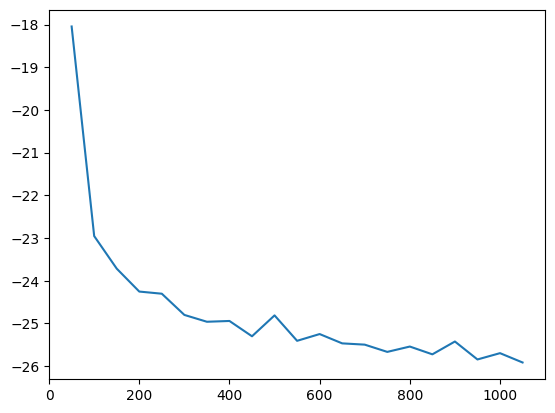

In [ ]:
epoch_list = range(50, 1100, 50)
plt.plot(epoch_list, psnr)

**IMAGE RECONSTRUCTION WITH MODEL**


In [ ]:
model.eval()
torch.no_grad()

new_image = np.empty((689, 1024, 3))
pred = model(torch.tensor(final_training_data, dtype=torch.float32))
pred = pred.detach().numpy()

for i in range(689):
  for j in range(1024):
    new_image[i][j] = pred[i*1024 + j]

print(pred.shape)





NameError: ignored

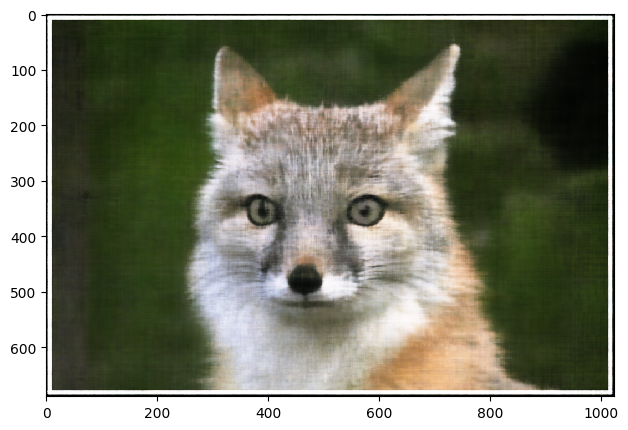

In [ ]:
skio.imshow(new_image)

**2.1**

In [61]:
data = np.load(f"lego_200x200.npz")

# Training images: [100, 200, 200, 3]
images_train = data["images_train"] / 255.0

# Cameras for the training images
# (camera-to-world transformation matrix): [100, 4, 4]
c2ws_train = data["c2ws_train"]

# Validation images:
images_val = data["images_val"] / 255.0

# Cameras for the validation images: [10, 4, 4]
# (camera-to-world transformation matrix): [10, 200, 200, 3]
c2ws_val = data["c2ws_val"]

# Test cameras for novel-view video rendering:
# (camera-to-world transformation matrix): [60, 4, 4]
c2ws_test = data["c2ws_test"]

# Camera focal length
focal = data["focal"]  # float

In [25]:
print(focal)

277.77775779844205


In [26]:
K = np.array([[focal, 0, images_train.shape[1] / 2],[0, focal, images_train.shape[2] / 2],[0,0,1]])

In [27]:
def transform(c2w, x_c):

  #c2w is (n , 4, 4)
  #x_c is (n, 3)
  ones = np.transpose(np.array([1 for i in range(len(x_c))])).reshape((len(x_c), 1))
  x_c = np.append(x_c, ones, axis=1).reshape((len(x_c), 4, 1))


  return c2w @ x_c

In [28]:
def pixel_to_camera(K, uv, s):

  #returns (n,3)
  #uv = (n, 2) np array
  print(uv.shape)
  ones = np.array([1 for i in range(len(uv))]).reshape((len(uv), 1))
  print(K.shape)
  coords = np.transpose(np.append(uv, ones, axis=1))
  print(coords.shape)
  return np.transpose(np.linalg.inv(K)@(s * coords))

In [29]:
def pixel_to_ray(K, c2w, uv):
  n = len(c2w)
  # get R_inverse (3,3) from c2w
  #c2w = [n, 4, 4]
  w2c = np.linalg.inv(c2w)

  #w2c = [n, 4, 4]

  R, t = w2c[:, 0:3, 0:3], w2c[:, 0:3, 3].reshape((len(c2w), 3, 1))

  #R = [n, 3, 3], t = [n, 3, 1]

  R_inv = np.linalg.inv(R)


  #R_inv = [n, 3, 3],


  # Apply R_inverse to t to get r0
  r0 = np.squeeze((-1 * (R_inv @ t)))
  #r0 = [n,3,1]
  # Find Xw using previous two methods.
  Xc = pixel_to_camera(K, uv, 1)
  Xw = transform(c2w, Xc)[:, :3]
  Xw = np.squeeze(Xw)
  #Xw = (n, 3)
  print(Xw.shape)

  print
  # Calculate rd
  print(r0.shape)
  l2norm = (np.sqrt(np.sum(np.square(Xw - r0), axis=1))).reshape((n, 1))
  print(l2norm.shape)
  rd = (Xw - r0)  / l2norm
  print(rd.shape)
  return r0, rd

In [30]:
flattened_training_data = []
flattened_training_labels = []
flattened_training_cameras = []
for i in range(len(images_train)):
  for j in range(len(images_train[i])):
    for k in range(len(images_train[i][j])):
      flattened_training_data.append([i, j, k])
      flattened_training_labels.append(images_train[i][j][k])
      flattened_training_cameras.append(c2ws_train[i])

del images_train
del c2ws_train

flattened_val_data = []
flattened_val_labels = []
flattened_val_cameras = []
for i in range(len(images_val)):
  for j in range(len(images_val[i])):
    for k in range(len(images_val[i][j])):
      flattened_val_data.append([i, j, k])
      flattened_val_labels.append(images_val[i][j][k])
      flattened_val_cameras.append(c2ws_val[i])


del images_val
del c2ws_val


flattened_test_data = []

flattened_test_cameras = []
for i in range(60):
  for j in range(200):
    for k in range(200):
      flattened_test_data.append([i, j, k])
      flattened_test_cameras.append(c2ws_test[i])



In [31]:
flattened_training_data = np.array(flattened_training_data)
flattened_training_labels = np.array(flattened_training_labels)
flattened_training_cameras = np.array(flattened_training_cameras)
flattened_val_data = np.array(flattened_val_data)
flattened_val_labels = np.array(flattened_val_labels)
flattened_val_cameras = np.array(flattened_val_cameras)
flattened_test_data = np.array(flattened_test_data)
flattened_test_cameras = np.array(flattened_test_cameras)

**2.2: Sampling**

In [32]:
def sample_rays(flattened_data, flattened_cameras, n):
  assert len(flattened_data) == len(flattened_cameras), "invalid lengths"
  #return r0 and rd where r0 = (n,3) and rd = (n,3)
  samples = np.random.choice(np.arange(len(flattened_data)), size=(n),replace=False)

  uv = flattened_data[samples, 1:]
  c2w = flattened_cameras[samples]

  return pixel_to_ray(K, c2w, uv)


r0, rd = sample_rays(flattened_training_data, flattened_training_cameras, 64)


def all_rays(flattened_data, flattened_cameras, K):
  assert len(flattened_data) == len(flattened_cameras), "invalid lengths"
  uv = flattened_data[:, 1:]
  c2w = flattened_cameras

  return pixel_to_ray(K, c2w, uv)

(64, 2)
(3, 3)
(3, 64)
(64, 3)
(64, 3)
(64, 1)
(64, 3)


In [33]:
def sample_along_rays(r0, rd, n=64, near=2, far=6, perturb=True):
  print(r0.shape)
  print(rd.shape)
  t = np.linspace(near, far, n).reshape(n, 1)
  t = t + np.random.rand(*t.shape) * ((far - near) / n)

  return r0 + rd * t



In [34]:
def bsar(ray_o, ray_d, n_samples=64, near=2.0, far=6.0, perturb=True):
  m = ray_o.shape[0]

  # Generate sample depths
  intervals = np.linspace(near, far, n_samples + 1).reshape(1, n_samples + 1, 1)
  t = intervals[:, :-1, :] + (far - near) / (n_samples * 2)
  # Add a different random perturbation to each sample depth for each ray
  if perturb:
      perturbed = intervals + np.random.rand(m, n_samples + 1, 1) * ((far - near) / n_samples)
      deltas = perturbed[:, 1:, :] - perturbed[:, :-1, :]
      t = perturbed[:, :-1, :] + (deltas / 2)
  else:
    deltas = np.zeros(t.shape)
    # Expand ray origins and directions to match the number of samples
  ray_o_expanded = np.expand_dims(ray_o, axis=1)  # Shape (m, 1, 3)
  ray_d_expanded = np.expand_dims(ray_d, axis=1)  # Shape (m, 1, 3)
  # Calculate the 3D points for the samples
  samples = ray_o_expanded + t * ray_d_expanded

  return samples, deltas

In [35]:
def batched_sample_along_rays(ray_o, ray_d, n_samples=64, near=2.0, far=6.0, perturb=True):
    """
    Samples points along rays and adds a different random perturbation to each sample.

    Parameters:
    ray_o (np.ndarray): The origins of the rays in the shape of (m, 3),
                        where m is the number of rays.
    ray_d (np.ndarray): The directions of the rays in the shape of (m, 3).
    n_samples (int): The number of samples per ray.

    Returns:
    np.ndarray: Sampled and perturbed points along the rays of shape (m, n_samples, 3).
    """
    m = ray_o.shape[0]

    # Generate sample depths
    intervals = np.linspace(near, far, n_samples + 1).reshape(1, n_samples + 1, 1)
    t = intervals[:, :-1, :] + (far - near) / (n_samples * 2)
    # Add a different random perturbation to each sample depth for each ray
    if perturb:
      t = t + np.random.rand(m, n_samples, 1) * ((far - near) / n_samples)

    # Expand ray origins and directions to match the number of samples
    ray_o_expanded = np.expand_dims(ray_o, axis=1)  # Shape (m, 1, 3)
    ray_d_expanded = np.expand_dims(ray_d, axis=1)  # Shape (m, 1, 3)

    # Calculate the 3D points for the samples
    samples = ray_o_expanded + t * ray_d_expanded

    return samples

In [62]:
import viser, time  # pip install viser
import numpy as np

# --- You Need to Implement These ------
#dataset = RaysData(flattened_training_data, K, flattened_training_labels, flattened_training_cameras)
#rays_o, rays_d, pixels = dataset.sample_rays(100) # Should expect (B, 3)
indices = np.random.choice(range(len(trays_o)), size = 100, replace=False)
rays_o = trays_o[indices]
rays_d = np.squeeze(trays_d[indices])

pixels = tpixels[100]
points = batched_sample_along_rays(rays_o, rays_d, perturb=False, n_samples=100)
H, W = images_train.shape[1:3]
# ---------------------------------------

server = viser.ViserServer(share=True)
for i, (image, c2w) in enumerate(zip(images_train, c2ws_train)):
    server.add_camera_frustum(
        f"/cameras/{i}",
        fov=2 * np.arctan2(H / 2, K[0, 0]),
        aspect=W / H,
        scale=0.15,
        wxyz=viser.transforms.SO3.from_matrix(c2w[:3, :3]).wxyz,
        position=c2w[:3, 3],
        image=image
    )
for i, (o, d) in enumerate(zip(rays_o, rays_d)):
    server.add_spline_catmull_rom(
        f"/rays/{i}", positions=np.stack((o, o + d * 6.0)),
    )
server.add_point_cloud(
    f"/samples",
    colors=np.zeros_like(points).reshape(-1, 3),
    points=points.reshape(-1, 3),
    point_size=0.02,
)
time.sleep(1000)

(viser) Share URL requested! (expires in 24 hours)

╭─────────────────────────── viser ───────────────────────────╮
│             ╷                                               │
│   HTTP      │ http://0.0.0.0:8081                           │
│   Websocket │ ws://0.0.0.0:8081                             │
│   Share URL │ https://replica-backprop.share.viser.studio   │
│             ╵                                               │
╰─────────────────────────────────────────────────────────────╯

(viser) Connection opened (0, 1 total), 405 persistent messages

In [60]:
# Visualize Cameras, Rays and Samples
import viser, time
import numpy as np

# --- You Need to Implement These ------
#dataset = RaysData(flattened_training_data, K, flattened_training_labels, flattened_training_cameras)

# This will check that your uvs aren't flipped
uvs_start = 0
uvs_end = 40_000
sample_uvs = tuvs[uvs_start:uvs_end] # These are integer coordinates of widths / heights (xy not yx) of all the pixels in an image
# uvs are array of xy coordinates, so we need to index into the 0th image tensor with [0, height, width], so we need to index with uv[:,1] and then uv[:,0]
test = images_train[0, sample_uvs[:,1], sample_uvs[:,0]] ==tpixels[uvs_start:uvs_end]

assert np.all(images_train[0, sample_uvs[:,1], sample_uvs[:,0]] == tpixels[uvs_start:uvs_end])

# Uncoment this to display random rays from the first image
indices = np.random.randint(low=0, high=40_000, size=100)

# # Uncomment this to display random rays from the top left corner of the image
#indices_x = np.random.randint(low=100, high=200, size=100)
#indices_y = np.random.randint(low=0, high=100, size=100)
#indices = indices_x + (indices_y * 200)

data = {"rays_o": trays_o[indices], "rays_d": np.squeeze(trays_d)[indices]}
points = sample_along_rays(data["rays_o"], data["rays_d"], perturb=True, n=100)
# ---------------------------------------

server = viser.ViserServer(share=True)
for i, (image, c2w) in enumerate(zip(images_train, c2ws_train)):
  server.add_camera_frustum(
    f"/cameras/{i}",
    fov=2 * np.arctan2(H / 2, K[0, 0]),
    aspect=W / H,
    scale=0.15,
    wxyz=viser.transforms.SO3.from_matrix(c2w[:3, :3]).wxyz,
    position=c2w[:3, 3],
    image=image
  )
for i, (o, d) in enumerate(zip(data["rays_o"], data["rays_d"])):
  positions = np.stack((o, o + d * 6.0))
  server.add_spline_catmull_rom(
      f"/rays/{i}", positions=positions,
  )
server.add_point_cloud(
    f"/samples",
    colors=np.zeros_like(points).reshape(-1, 3),
    points=points.reshape(-1, 3),
    point_size=0.03,
)
time.sleep(1000)

NameError: ignored

In [ ]:
# import torch
# torch.manual_seed(42)
# sigmas = torch.rand((10, 64, 1))
# rgbs = torch.rand((10, 64, 3))
# step_size = (6.0 - 2.0) / 64
# rendered_colors = volrend(sigmas, rgbs, step_size)
# rendered_colors = rendered_colors.to("cuda")

# correct = torch.tensor([
#     [0.5006, 0.3728, 0.4728],
#     [0.4322, 0.3559, 0.4134],
#     [0.4027, 0.4394, 0.4610],
#     [0.4514, 0.3829, 0.4196],
#     [0.4002, 0.4599, 0.4103],
#     [0.4471, 0.4044, 0.4069],
#     [0.4285, 0.4072, 0.3777],
#     [0.4152, 0.4190, 0.4361],
#     [0.4051, 0.3651, 0.3969],
#     [0.3253, 0.3587, 0.4215]
#   ])
# correct = correct.to("cuda")

# print(rendered_colors)
# assert torch.allclose(rendered_colors, correct, rtol=1e-4, atol=1e-4)

NameError: ignored

In [36]:
def volrend(sigmas, rgbs, step_size):
  sum_elements = torch.squeeze(-1 * sigmas * step_size)
  fill = torch.exp(torch.cumsum(sum_elements[:, :-1], 1))
  fill = fill.to("cuda")
  ones = torch.full((sum_elements.shape[0], 1), 1)
  ones = ones.to("cuda")
  fill = torch.cat((fill,ones), dim=1)
  fill = torch.roll(fill,1, dims=1)
  new = torch.reshape(fill, sigmas.shape)
  expvector = 1 - torch.exp(-1 * sigmas * step_size)
  #expvector = expvector.to("cuda")
  #rgbs = rgbs.to("cuda")
  #new = new.to("cuda")
  finals = expvector * rgbs * new
  return torch.sum(finals, 1)



In [ ]:
# dataset = RaysData(K, flattened_training_data,  flattened_training_labels, flattened_training_cameras, flattened_val_data, flattened_val_labels, flattened_val_cameras)

In [ ]:
# class RaysData:
#   def __init__(self, K, ftdata,  ftlabels, ftcams, valdata, vallabels, valcams):
#     n_samples = 32
#     near = 2
#     far = 6
#     K = K
#     tdata = ftdata
#     tcams = ftcams
#     tpixels = ftlabels

#     vdata = valdata
#     vlabels = vallabels
#     valcams = valcams

#     txs = tdata[:, 2].reshape((len(tdata), 1))
#     tys = tdata[:, 1].reshape((len(tdata), 1))

#     tuvs = np.append(txs, tys, axis=1)
#     trays_o, trays_d = all_rays(K, tcams, tuvs)
#     tall_samples = batched_sample_along_rays(trays_o, trays_d, n_samples=n_samples)
#     unperturbed_delta = (far - near) / n_samples

#     vxs = vdata[:, 2].reshape((len(vdata), 1))
#     vys = vdata[:, 1].reshape((len(vdata), 1))

#     vuvs = np.append(vxs, vys, axis=1)
#     vrays_o, vrays_d = all_rays(K, valcams, vuvs)
#     vall_samples = batched_sample_along_rays(vrays_o, vrays_d, n_samples=n_samples)




#   def sample_rays(self, n):
#     #print(len(data))
#     #print(len(cams))
#     assert len(tdata) == len(tcams), "invalid lengths"
#     #return r0 and rd where r0 = (n,3) and rd = (n,3)
#     samples = np.random.choice(np.arange(len(data)), size=(n),replace=False)

#     uv = uvs[samples, :]
#     c2w = tcams[samples]
#     r0, rd = pixel_to_ray(K, c2w, uv + 0.5)
#     return r0, rd, pixels[samples, :]

#   def all_rays(self, K, cams, uvs):
#     #print(len(uvs))
#     #print(len(cams))
#     assert len(uvs) == len(cams), "invalid lengths"



#     return pixel_to_ray(K, cams, uvs)








In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        # Encoder part
        self.linear1 = nn.Linear(63, 256)
        self.linear2 = nn.Linear(256, 256)
        self.linear3 = nn.Linear(256, 256)
        self.linear4 = nn.Linear(256, 256)
        self.linear5 = nn.Linear(256 + 63, 256)
        self.linear6 = nn.Linear(256, 256)
        self.linear7 = nn.Linear(256, 256)
        self.linear8 = nn.Linear(256, 256)

        # Decoder part for density prediction
        self.linear_density1 = nn.Linear(256, 1)   # Concatenated vector


        # Decoder part for color prediction
        self.linear_color1 = nn.Linear(256, 256)   # Concatenated vector
        self.linear_color2 = nn.Linear(256 + 27, 128)
        self.linear_color3 = nn.Linear(128, 3)

    def forward(self, x, r_d):
        # Positional encoding (PE) not implemented, assuming input x and r_d are already positionally encoded

        # Encoder
        new = F.relu(self.linear1(x))
        new = F.relu(self.linear2(new))
        new = F.relu(self.linear3(new))
        new = F.relu(self.linear4(new))

        new = torch.cat((new, x), dim=2)

        new = F.relu(self.linear5(new))
        new = F.relu(self.linear6(new))
        new = F.relu(self.linear7(new))
        new = self.linear8(new)

        # Concatenate the output of the encoder with the directionally encoded vector


        # Density branch
        density = F.relu(self.linear_density1(new))

        # Color branch
        color = self.linear_color1(new)

        color = torch.cat((color, r_d), dim=2)
        color = F.relu(self.linear_color2(color))
        color = torch.sigmoid(self.linear_color3(color))

        return density, color

In [21]:
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import RandomSampler

# Example training data: An array of pixel positions (x, y) and their corresponding RGB values
# For demonstration, let's create a dummy dataset
  # 1000 samples, each with 2 features (x, y) and 3 RGB values

# Splitting the data into features and labels
   # RGB values
losses  = []
# Convert to PyTorch tensors



# Create a dataset and data loader






#neur = CustomNeuralNetwork().to(device)
diff = CustomNeuralNetwork().to(device)
# Define a simple training loop
def train_model(model, epochs=1000, lr=0.01, batch_size=10000):
    model.train()
    torch.enable_grad()
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    i = 0
    points = torch.tensor(tall_samples, dtype=torch.float32).to(device)
    vpoints =  torch.tensor(vall_samples, dtype=torch.float32).to(device)
    vpixels =  torch.tensor(valpixels, dtype=torch.float32).to(device)
    vraysd =  torch.tensor(vrays_d, dtype=torch.float32).to(device)
    pixels =  torch.tensor(tpixels, dtype=torch.float32).to(device)
    raysd =  torch.tensor(trays_d, dtype=torch.float32).to(device)
    tdelta =  torch.tensor(tdeltas, dtype=torch.float32).to(device)
    vdelt =  torch.tensor(vdeltas, dtype=torch.float32).to(device)
    trainlosses = []
    vallosses = []
    trange = np.arange(len(points))
    vrange = np.arange(len(vpoints))
    while i < epochs:
      indices = np.random.choice(trange, size=batch_size, replace=True)
      x_features, labels, rd_features, tdelt = points[indices], pixels[indices], raysd[indices], tdelta[indices]
      x_features = broadcast_SPE(x_features,10).to(device)
      rd_features = broadcast_SPE(rd_features, 4).expand(batch_size, n_samples, 27).to(device)
      optimizer.zero_grad()

      outputs = model(x_features.float(), rd_features.float())
      preds = volrend(outputs[0], outputs[1], tdelt)

      loss = criterion(preds, labels)

      loss.backward()
      optimizer.step()

      trainlosses.append(loss.item())
      if i % 50 == 49:


        model.eval()
        torch.no_grad()
        indices = [np.random.choice(vrange, size=batch_size // 10, replace=True)]
        vx_features, vlabels, vrd_features = vpoints[:(len(vpoints)//10) * 6].detach(), vpixels[:(len(vpoints)//10) * 6].detach(), vraysd[:(len(vpoints)//10) * 6].detach()


        vx_features = broadcast_SPE(vx_features,10).to(device).detach()
        vrd_features = broadcast_SPE(vrd_features, 4).expand((len(vpoints)//10) * 6, n_samples, 27).to(device).detach()
        val_outputs = model(vx_features.float(), vrd_features.float()).detach()
        vpreds = volrend(val_outputs[0], val_outputs[1], unperturbed_delta).detach()
        valloss = criterion(vpreds, vlabels).detach()
        print(f"Epoch [{i+1}/{epochs}], Training Loss: {loss.item():.4f}, Val Loss: {valloss.item():.4f} ")
        vallosses.append(valloss.item())
        model.train()
        torch.enable_grad()
      if i % 500 == 0:
        model.eval()
        torch.no_grad()
        im = predict_image(model, vpoints, vraysd)
        skio.imsave(f"lego{(i//200)}.jpg", (im * 255).astype(np.uint8))
        model.train()
        torch.enable_grad()
      i += 1
    return trainlosses,vallosses
"""        for batch_features, batch_labels in dataloader:

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_features)

            # Compute the loss
            loss = criterion(outputs, batch_labels)

            #psnr = 10 * np.log10(loss)
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            i += 1
            if i % 50 == 49:
              print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}")
              losses.append(loss)
"""

# Training the model
loss = train_model(diff, epochs=2000, lr=0.00005, batch_size=10000)

<ipython-input-16-03275d16e16c>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  newpoints =  torch.tensor(samples[i * 20:(i+1) * 20], dtype=torch.float32).to(device).detach()
<ipython-input-16-03275d16e16c>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  raysd =  torch.tensor(rays[i * 20:(i+1) * 20], dtype=torch.float32).to(device).detach()


iteration 0
iteration 400
iteration 800
iteration 1200
iteration 1600


<ipython-input-21-df9186611e29>:88: UserWarning: lego0.jpg is a low contrast image
  skio.imsave(f"lego{(i//200)}.jpg", (im * 255).astype(np.uint8))


OutOfMemoryError: ignored

In [ ]:
torch.save(neur.state_dict(), "DOWNLOADTHISMODEL.pt")
np.save("DOWNLOADTHISLOSS", np.array(loss), allow_pickle=True, fix_imports=True)



<ipython-input-26-a3ee7eba7de9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save("DOWNLOADTHISLOSS", np.array(loss), allow_pickle=True, fix_imports=True)


In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

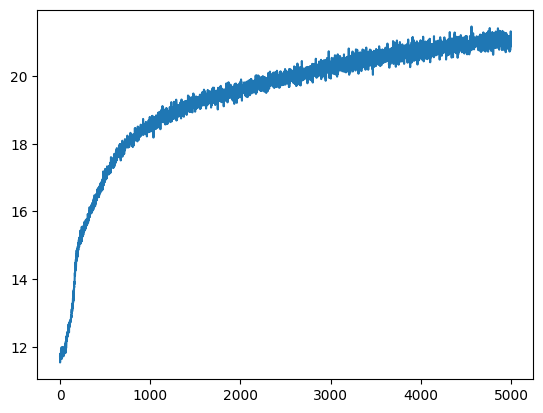

In [ ]:
trainingloss = loss[0]

psnr = -1 * 10 * np.log10(np.array(trainingloss))
plt.plot(range(5000), psnr)

In [ ]:
np.save("BESTMODELFRLOSSES", np.array(loss), allow_pickle=True, fix_imports=True)

<ipython-input-39-a4192988555b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save("BESTMODELFRLOSSES", np.array(loss), allow_pickle=True, fix_imports=True)


In [ ]:
valloss = loss[0]

In [ ]:
valloss = np.array(valloss)
means = np.append((valloss[:-4] + valloss[1:-3] + valloss[2:-2] + valloss[3:-1] + valloss[4:]) / 5, valloss[-4:])


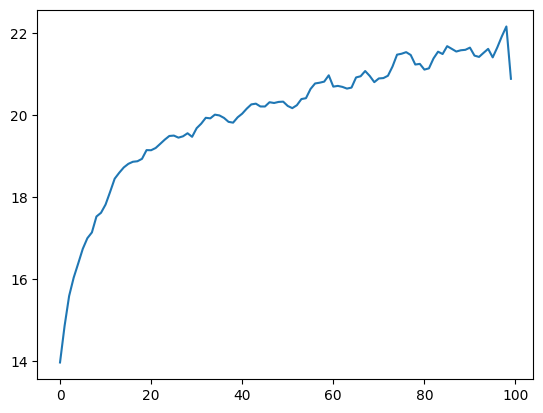

In [ ]:
psnr = -1 * 10 * np.log10(np.array(means))
plt.plot(range(100), psnr)

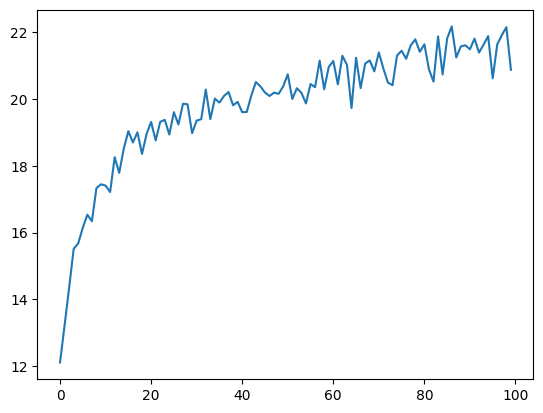

In [ ]:
psnr = -1 * 10 * np.log10(np.array(valloss))
plt.plot(range(100), psnr)

In [ ]:
im = predict_image(neur)

iteration 0
iteration 400
iteration 800
iteration 1200
iteration 1600


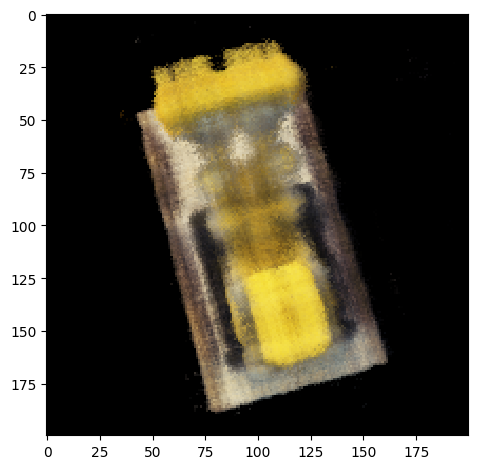

In [ ]:
skio.imshow(im)

In [44]:
neur = CustomNeuralNetwork().to(device)

In [45]:
neur.load_state_dict(torch.load("DOWNLOADTHISMODEL.pt"))

<All keys matched successfully>

In [ ]:
vxs = vdata[:, 2].reshape((len(vdata), 1))
vys = vdata[:, 1].reshape((len(vdata), 1))

vuvs = np.append(vxs, vys, axis=1)
vrays_o, vrays_d = all_rays(K, valcams, vuvs)
vall_samples = batched_sample_along_rays(vrays_o, vrays_d, n_samples=n_samples,perturb =False)


vrays_d = vrays_d.reshape(vrays_d.shape[0], 1, vrays_d.shape[1])



400000
400000
(400000, 2)
(3, 3)
(3, 400000)
(400000, 3)
(400000, 3)
(400000, 1)
(400000, 3)


In [47]:
def predict_image(model, samples, rays):

  final = []
  for i in range(2000):

    newpoints =  torch.tensor(samples[i * 20:(i+1) * 20], dtype=torch.float32).to(device).detach()

    raysd =  torch.tensor(rays[i * 20:(i+1) * 20], dtype=torch.float32).to(device).detach()
    model.eval()
    torch.no_grad()

    newfeatures,  rd_features = newpoints,  raysd

    features = broadcast_SPE(newfeatures,10).to(device)
    rd_features = broadcast_SPE(rd_features, 4).expand(len(rd_features), n_samples, 27).to(device)


    outputs = model(features.float(), rd_features.float())
    preds = volrend(outputs[0], outputs[1], unperturbed_delta).detach()
    preds = preds.to("cpu")
    final.append(preds)


  final = [i.cpu() for i in final]
  final = [i.detach() for i in final]
  final = np.array([i.numpy() for i in final])
  final.shape


  img = np.zeros((200, 200, 3))
  for i in range(len(final)):
    for j in range(len(final[0])):
      num = i* 20 + j
      img[num //200][num % 200] = final[i][j]
  print("done rendering image")
  return img

In [ ]:
torch.save(neur.state_dict(), "BESTMODELFR.pt")

In [ ]:
image = predict_image(neur)

iteration 4
iteration 54
iteration 104
iteration 154
iteration 204
iteration 254
iteration 304
iteration 354
iteration 404
iteration 454
iteration 504
iteration 554
iteration 604
iteration 654
iteration 704
iteration 754


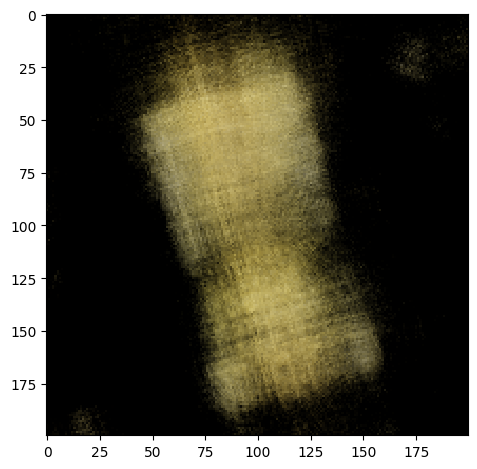

In [ ]:
skio.imshow(image)

In [ ]:
final.shape

(800, 50, 3)

In [ ]:
img = np.zeros((200, 200, 3))
for i in range(len(final)):
  for j in range(len(final[0])):
    num = i* 50 + j
    img[num //200][num % 200] = final[i][j]

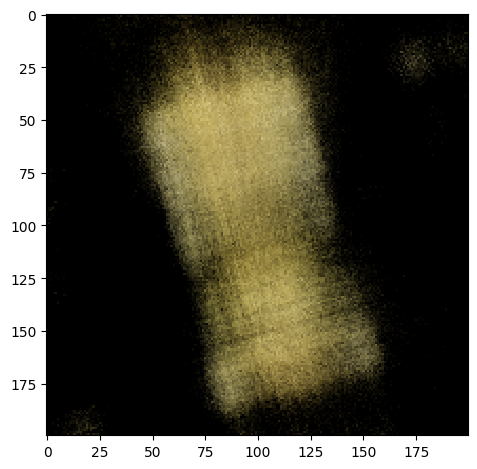

In [ ]:
skio.imshow(img)

In [ ]:
import gc
del tdata
del trays_o

gc.collect()

3370

In [39]:
def sample_rays(n):
  #print(len(data))
  #print(len(cams))
  assert len(tdata) == len(tcams), "invalid lengths"
  #return r0 and rd where r0 = (n,3) and rd = (n,3)
  samples = np.random.choice(np.arange(len(data)), size=(n),replace=False)

  uv = uvs[samples, :]
  c2w = tcams[samples]
  r0, rd = pixel_to_ray(K, c2w, uv + 0.5)
  return r0, rd, pixels[samples, :]

def all_rays(K, cams, uvs):
  print(len(uvs))
  print(len(cams))
  assert len(uvs) == len(cams), "invalid lengths"



  return pixel_to_ray(K, cams, uvs + 0.5)

In [ ]:
valpixels = flattened_val_labels

In [ ]:
print(trays_o.shape)
print(trays_d.shape)
print(tdeltas.shape)
print(tall_samples.shape)
print(tpixels.shape)

NameError: ignored

In [ ]:
tindices = np.random.choice(range(4000000), size=1000000)
vindices = np.random.choice(range(400000), size= 1000000)

In [28]:
testdata.shape

(2400000, 3)

In [59]:

n_samples = 32
near = 2
far = 6


# tdata = flattened_training_data[tindices]
# tcams = flattened_training_cameras[tindices]
# tpixels = flattened_training_labels[tindices]
# vdata = flattened_val_data[vindices]
# valcams = flattened_val_cameras[vindices]
# valpixels = flattened_val_labels[vindices]


tdata = flattened_training_data
tcams = flattened_training_cameras
tpixels = flattened_training_labels
vdata = flattened_val_data
valcams = flattened_val_cameras
valpixels = flattened_val_labels
testdata = flattened_test_data
testcams = flattened_test_cameras





txs = tdata[:, 2].reshape((len(tdata), 1))
tys = tdata[:, 1].reshape((len(tdata), 1))

tuvs = np.append(txs, tys, axis=1)
trays_o, trays_d = all_rays(K, tcams, tuvs)
tall_samples, tdeltas = bsar(trays_o, trays_d, n_samples=n_samples,perturb=True)
unperturbed_delta = (far - near) / n_samples

vxs = vdata[:, 2].reshape((len(vdata), 1))
vys = vdata[:, 1].reshape((len(vdata), 1))

vuvs = np.append(vxs, vys, axis=1)
vrays_o, vrays_d = all_rays(K, valcams, vuvs)
vall_samples,vdeltas = bsar(vrays_o, vrays_d, n_samples=n_samples,perturb =False)


testxs = testdata[:, 2].reshape((len(testdata), 1))
testys = testdata[:, 1].reshape((len(testdata), 1))

testuvs = np.append(testxs, testys, axis=1)
testrays_o, testrays_d = all_rays(K, testcams, testuvs)
testall_samples, testdeltas = bsar(testrays_o, testrays_d, n_samples=n_samples,perturb=False)

vrays_d = vrays_d.reshape(vrays_d.shape[0], 1, vrays_d.shape[1])

trays_d = trays_d.reshape(trays_d.shape[0], 1, trays_d.shape[1])
testrays_d = testrays_d.reshape(testrays_d.shape[0], 1, testrays_d.shape[1])

4000000
4000000
(4000000, 2)
(3, 3)
(3, 4000000)
(4000000, 3)
(4000000, 3)
(4000000, 1)
(4000000, 3)
400000
400000
(400000, 2)
(3, 3)
(3, 400000)
(400000, 3)
(400000, 3)
(400000, 1)
(400000, 3)
2400000
2400000
(2400000, 2)
(3, 3)
(3, 2400000)
(2400000, 3)
(2400000, 3)
(2400000, 1)
(2400000, 3)


In [53]:
def broadcast_SPE(nums, L):
    nums = nums.cpu().numpy()
    x= nums[:, :, 0].reshape((nums.shape[0], nums.shape[1], 1))
    y= nums[:, :, 1].reshape((nums.shape[0], nums.shape[1], 1))
    z= nums[:, :, 2].reshape((nums.shape[0], nums.shape[1], 1))
    insidevals = np.array([1] + [2 ** (i // 2) * math.pi for i in range(L*2)])
    insidevals = np.tile(insidevals, (len(nums), len(nums[0]), 1))
    x = x * insidevals

    y = y * insidevals
    z = z * insidevals

    wheresin = np.full(x.shape, False)
    wheresin[:, :, 1::2] = True
    wherecos = np.full(x.shape, False)
    wherecos[:, :, 2::2] = True
    del insidevals
    np.sin(x, where=wheresin, out=x)
    np.cos(x, where=wherecos, out=x)
    np.sin(y, where=wheresin, out=y)
    np.cos(y, where=wherecos, out=y)
    np.sin(z, where=wheresin, out=z)
    np.cos(z, where=wherecos, out=z)
    del wheresin
    del wherecos
    return torch.tensor(np.concatenate([x, y, z], axis = 2))



In [42]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to GPU (cuda)
    device = torch.device('cuda:0')
    print(f'GPU is available: {torch.cuda.get_device_name(0)}')
else:
    # Set the device to CPU
    device = torch.device('cpu')
    print('GPU is not available, using CPU.')

GPU is available: Tesla V100-SXM2-16GB


In [42]:
print(testall_samples.shape)

(4000000, 32, 3)


In [54]:

imgs = []
for i in range(60):
  print(f"image {i + 1}")
  imgs.append(predict_image(neur, testall_samples[40000 * i: (40000 * (i+1))],testrays_d[40000 * i: 40000 * (i+1)] ))
#imgs = [predict_image(neur, testall_samples[40000 * i: (40000 * (i+1))], testrays_d[40000 * i: 40000 * (i+1)]) for i in  range(60)]

image 1
done rendering image
image 2
done rendering image
image 3
done rendering image
image 4
done rendering image
image 5
done rendering image
image 6
done rendering image
image 7
done rendering image
image 8
done rendering image
image 9
done rendering image
image 10
done rendering image
image 11
done rendering image
image 12
done rendering image
image 13
done rendering image
image 14
done rendering image
image 15
done rendering image
image 16
done rendering image
image 17
done rendering image
image 18
done rendering image
image 19
done rendering image
image 20
done rendering image
image 21
done rendering image
image 22
done rendering image
image 23
done rendering image
image 24
done rendering image
image 25
done rendering image
image 26
done rendering image
image 27
done rendering image
image 28
done rendering image
image 29
done rendering image
image 30
done rendering image
image 31
done rendering image
image 32
done rendering image
image 33
done rendering image
image 34
done rende

In [49]:
len(imgs)

60

In [56]:
gif = [Image.fromarray((img * 255).astype(np.uint8)) for img in imgs]
# duration is the number of milliseconds between frames; this is 40 frames per second
gif[0].save("array.gif", save_all=True, append_images=gif[1:], duration=(1000/60), loop=0)

In [65]:
loss = np.load("DOWNLOADTHISLOSS.npy", allow_pickle=True)

In [70]:
vallosses = -1 * 10 * np.log10(np.array(loss[1]))

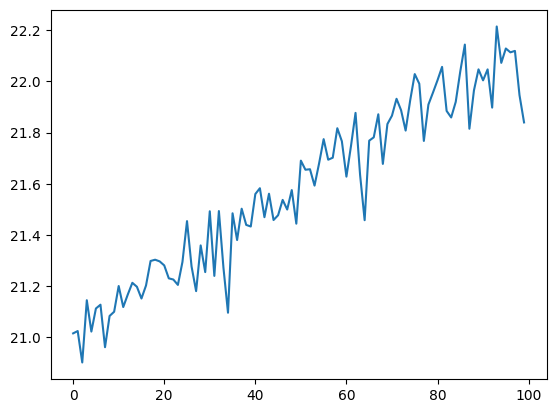

In [72]:
plt.plot(range(100), np.array(vallosses))